In [71]:
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.models import Model
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
df=pd.read_csv('disease_dataset.csv')
#print(df.columns)
lst=[]
for i in range(1,18):
    lst.append(i)
for i in lst:
    df['Symptom_'+str(i)]=df['Symptom_'+str(i)].apply(lambda x: str(x).strip()) 

diseases=set(df['Disease'])
symptoms=set(pd.concat([df['Symptom_'+str(i)] for i in lst],axis=0))
symptoms.discard(np.NaN)
#print(diseases)
encoder = LabelEncoder()
df['Target']=encoder.fit_transform(df['Disease'])
y=pd.get_dummies(df['Target'])
y_original=df['Target']
df.drop('Target',inplace=True,axis=1)

In [73]:
df2=pd.DataFrame(columns=symptoms)
#convert features to float
for x in symptoms:
    df2[x]=df2[x].astype(float)
#print(df2)
for key,item in df.iterrows():
    #print(key)
    dict={}
    for x in symptoms:
        dict[x]=0
    df2=df2.append(dict,ignore_index=True)
    index=len(df2)
    for i in lst:
        column='Symptom_'+str(i)
        value=str(item[column])
        if value != None:
            df2.loc[index-1,value]=1
X=df2            

print(X)



      nausea  watering_from_eyes  scurring  weight_gain  small_dents_in_nails  \
0        0.0                 0.0       0.0          0.0                   0.0   
1        0.0                 0.0       0.0          0.0                   0.0   
2        0.0                 0.0       0.0          0.0                   0.0   
3        0.0                 0.0       0.0          0.0                   0.0   
4        0.0                 0.0       0.0          0.0                   0.0   
...      ...                 ...       ...          ...                   ...   
4915     1.0                 0.0       0.0          0.0                   0.0   
4916     0.0                 0.0       1.0          0.0                   0.0   
4917     0.0                 0.0       0.0          0.0                   0.0   
4918     0.0                 0.0       0.0          0.0                   1.0   
4919     0.0                 0.0       0.0          0.0                   0.0   

      weakness_in_limbs  ex

In [74]:
print(len(X),len(y))
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3)

print(X_train)

4920 4920
      nausea  watering_from_eyes  scurring  weight_gain  small_dents_in_nails  \
358      0.0                 0.0       0.0          0.0                   0.0   
1454     1.0                 0.0       0.0          0.0                   0.0   
2563     1.0                 0.0       0.0          0.0                   0.0   
1298     0.0                 0.0       0.0          0.0                   0.0   
2106     0.0                 0.0       0.0          0.0                   0.0   
...      ...                 ...       ...          ...                   ...   
2082     1.0                 0.0       0.0          0.0                   0.0   
2787     0.0                 0.0       0.0          0.0                   0.0   
226      0.0                 0.0       0.0          0.0                   0.0   
4723     0.0                 0.0       0.0          0.0                   0.0   
3530     0.0                 0.0       0.0          0.0                   0.0   

      weakness_in

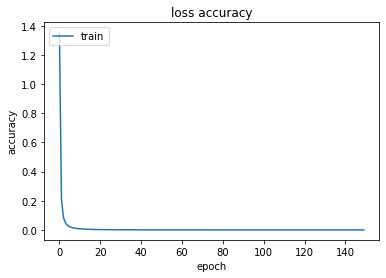

In [12]:
#print(y)
#print(len(y.columns))
model=Sequential()
model.add(layers.Input(shape=(len(symptoms),), name='main_input'))
model.add(Dense(300, activation='tanh')) 
model.add(Dense(100, activation='tanh')) 
model.add(Dense(64, activation='tanh')) 
model.add(Dense(34, activation='tanh')) 
model.add(Flatten())
model.add(Dense(len(y.columns),activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history=model.fit(X_train,y_train, epochs=150, verbose=0)

plt.plot(history.history['loss'])
plt.title('loss accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


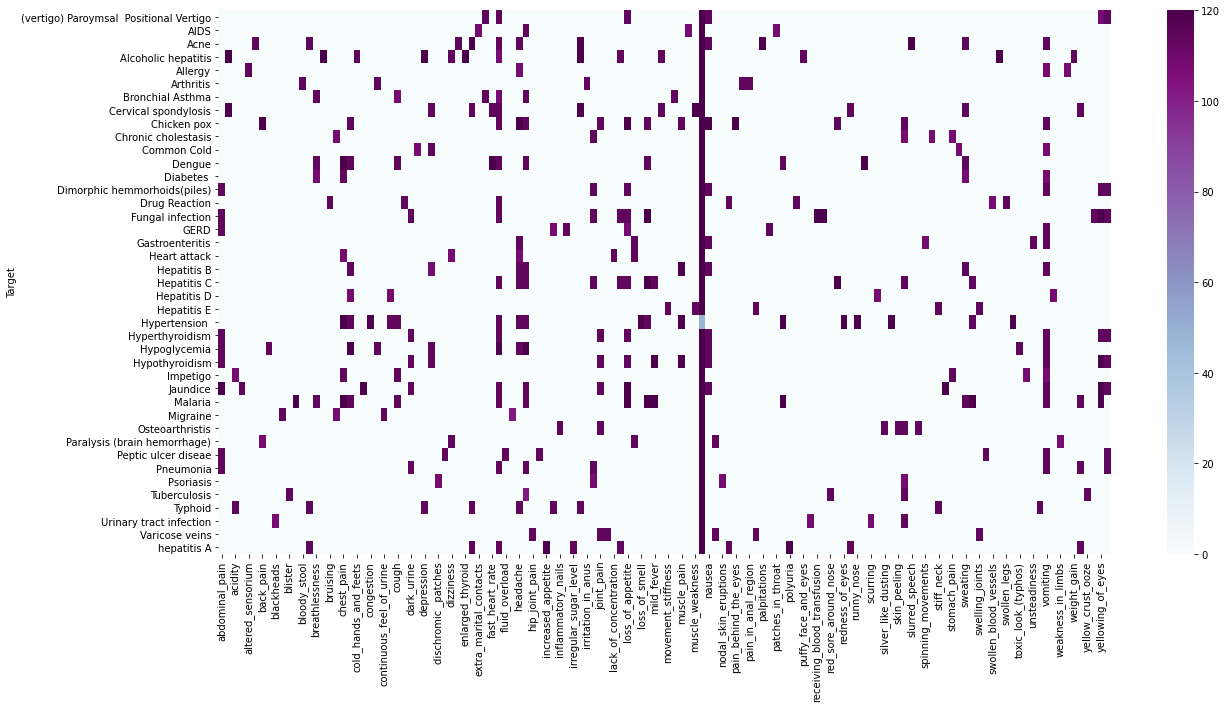

In [70]:

diseases=list(diseases)
#print(diseases)
y_new=[diseases[x] for x in y_original]
#print(y_new)
df3=pd.concat([X,pd.DataFrame({'Target':y_new})],axis=1)
#print(df3)
fp=pd.pivot_table(data=df3, index=['Target'],aggfunc='sum')
#print(fp)
fig,ax = plt.subplots(figsize=(20,10))
sns.heatmap(fp,ax=ax,cmap='BuPu',linecolor='black',linewidths=0)
plt.show()